# 1. Data OverView

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from plotly.subplots import make_subplots


In [51]:
train_df = pd.read_csv('churn-bigml-80.csv')
serving_df = pd.read_csv('churn-bigml-20.csv')

In [52]:
train_df.head(10)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   
5    AL             118        510                Yes              No   
6    MA             121        510                 No             Yes   
7    MO             147        415                Yes              No   
8    WV             141        415                Yes             Yes   
9    RI              74        415                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   
7                      0              157.0               79   
8                     37              258.6               84   
9                      0              187.7              127   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   
7             26.69              103.1               94              8.76   
8             43.96              222.0              111             18.87   
9             31.91              163.4              148             13.89   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                326.4                 97               14.69   
9                196.0                 94                8.82   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                11.2                 5               3.02   
9                 9.1                 5               2.46   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6

In [53]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(train_df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [54]:
dataoveriew(train_df, 'Overiew of the training dataset')


Overiew of the training dataset:

Rows: 2666

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         15

In [55]:
dataoveriew(serving_df, 'Overiew of the training dataset')


Overiew of the training dataset:

Rows: 667

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl call

# 2.Exploratory Data Analysis


2.1 Customer in data

**Tạo biểu đồ hiển thị khách hàng rời bỏ(churn) trong bộ train**

In [56]:
trace = go.Pie(
    labels=train_df["Churn"].value_counts().index,
    values=train_df["Churn"].value_counts().values,
    marker=dict(colors=['royalblue', 'lime']),
    textinfo='percent',  
    hoverinfo='label+percent',  
    hole=0.5, 
)

layout = go.Layout(
    title="Customer churn in training data",
    plot_bgcolor="white",  
    paper_bgcolor="white",  
    margin=dict(t=50, b=50, l=50, r=50),  
)

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)


2.2 Variable distributions

**phân tách các cột dữ liệu để trực quan hóa và sau đó tạo một pairplot để khám phá mối quan hệ giữa các biến**

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



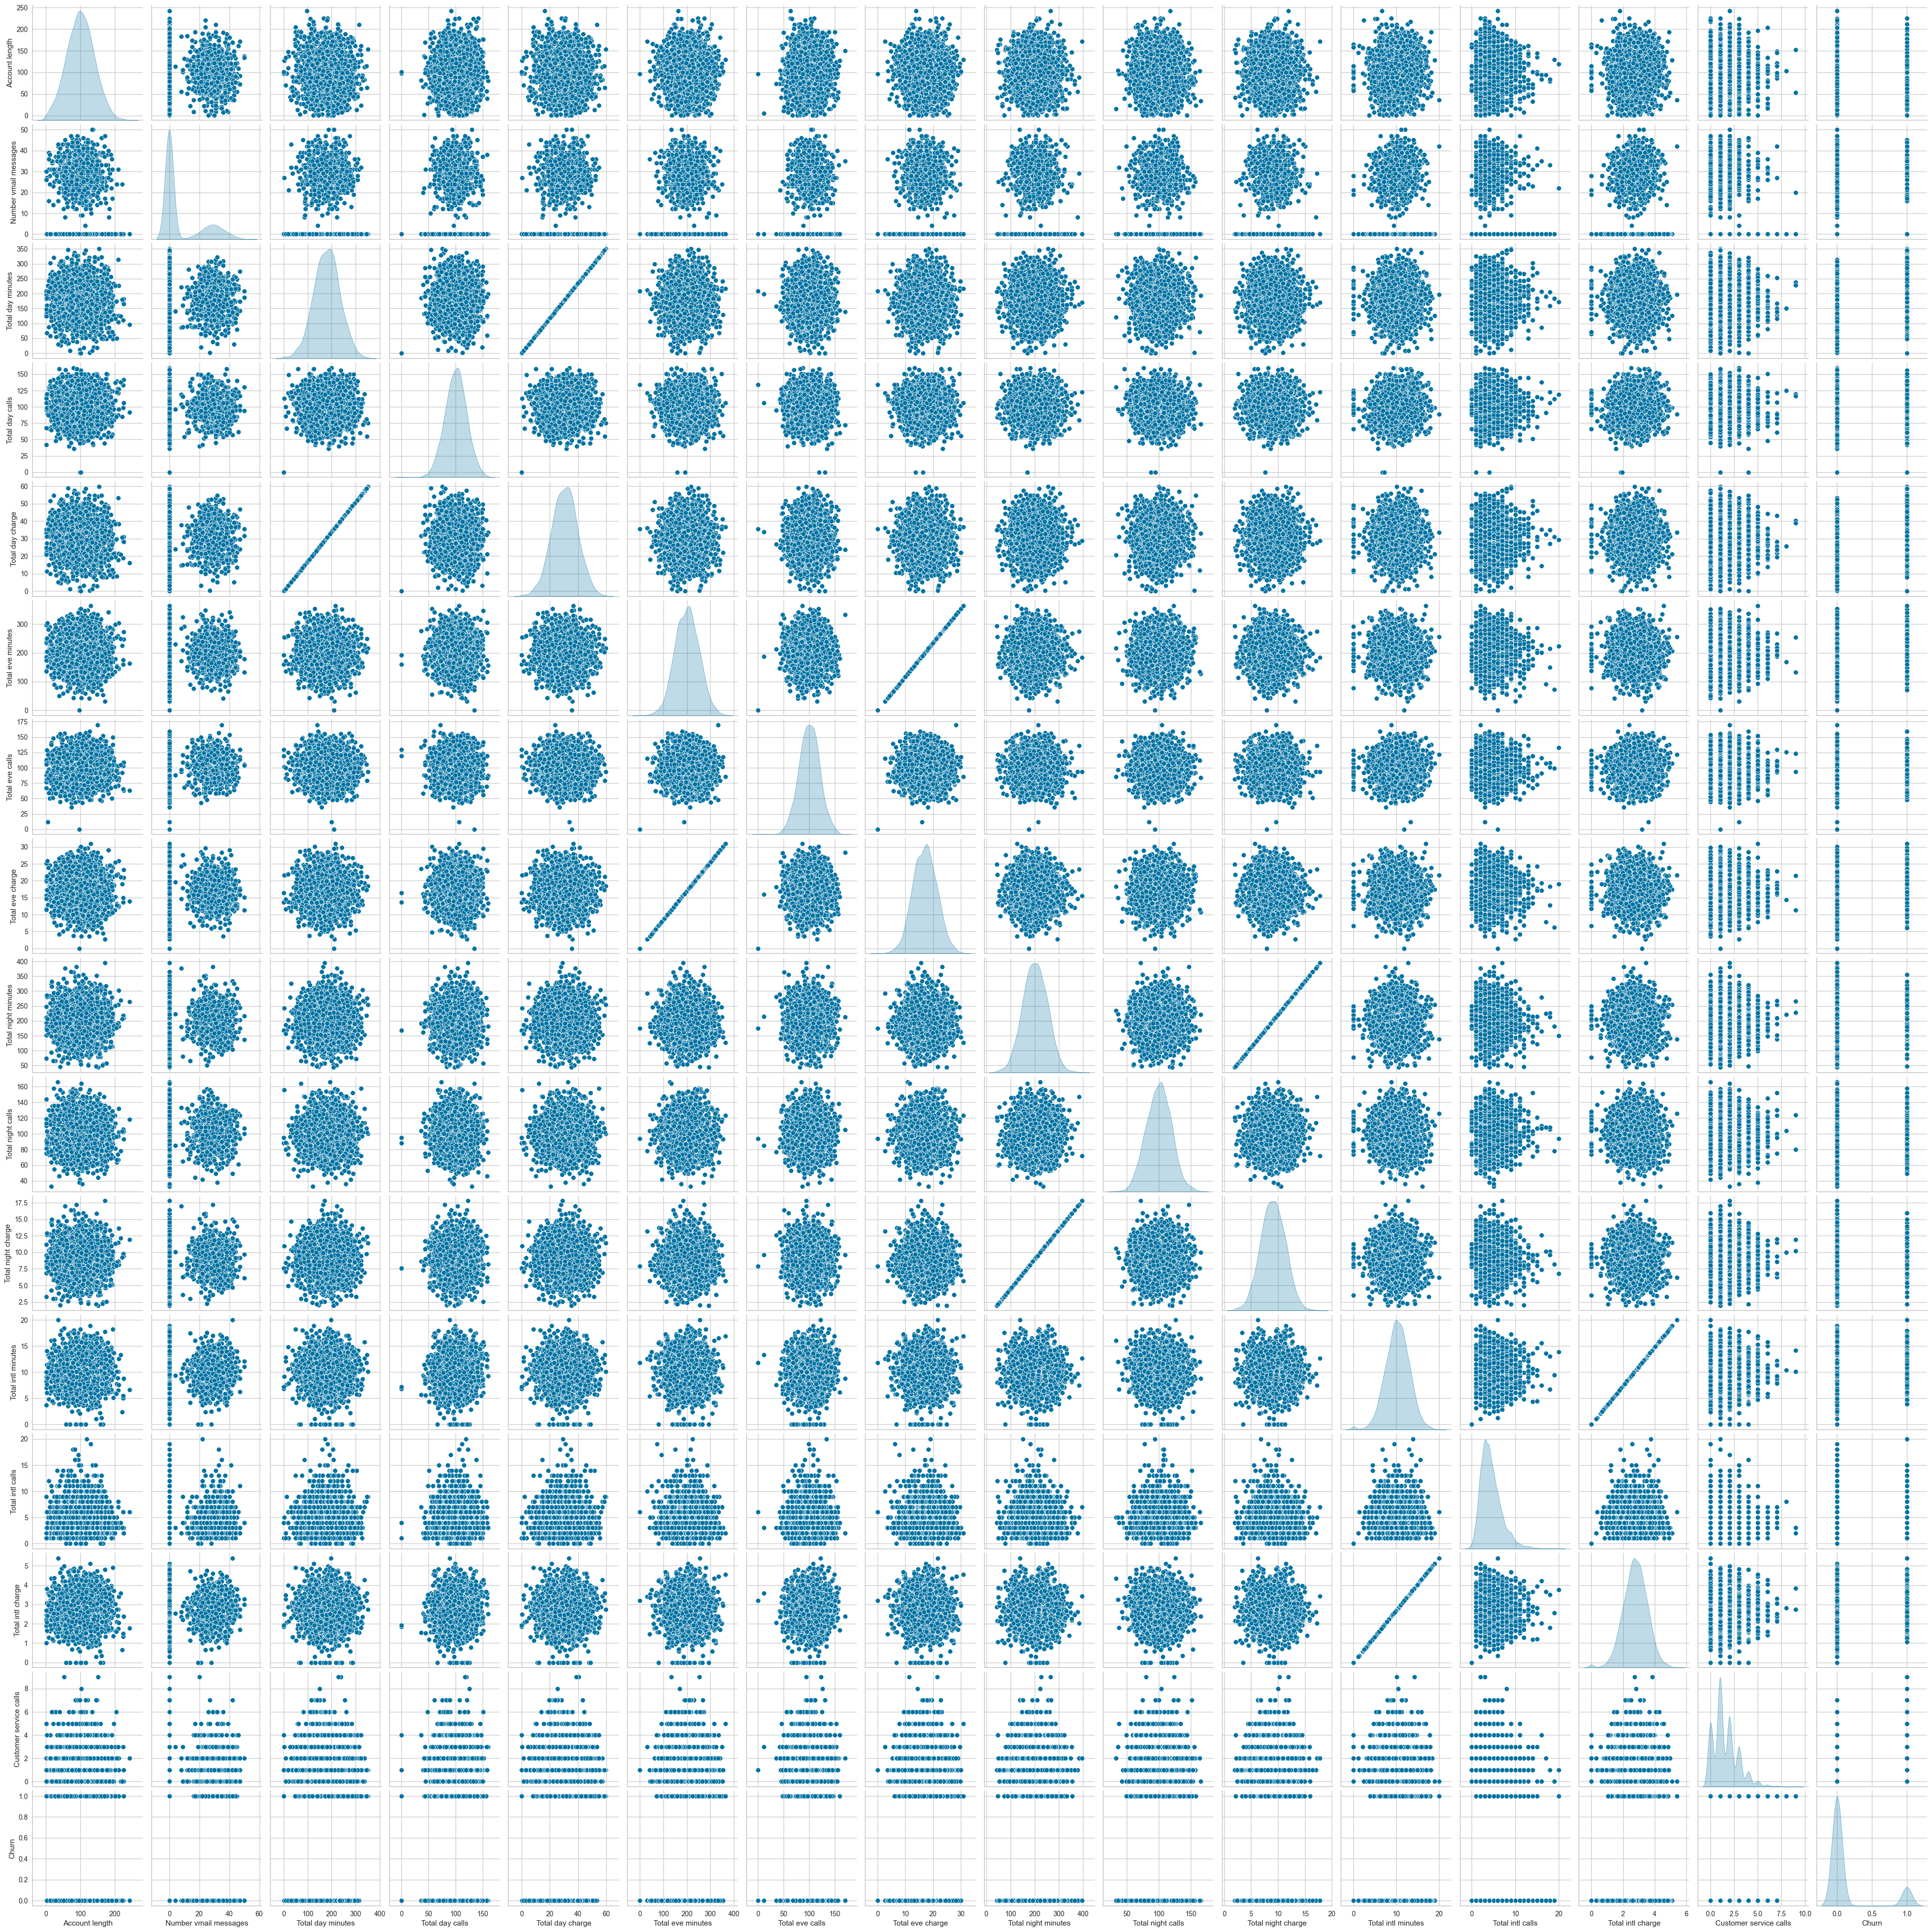

In [57]:
#Separating columns to be visualized
out_cols = list(set(train_df.nunique()[train_df.nunique()<6].keys().tolist()
                    + train_df.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in train_df.columns if x not in out_cols] + ['Churn']

sns.pairplot(train_df[viz_cols], diag_kind="kde")
plt.show()

# 3. Data Processing


- Loại bỏ các cột tương quan và không cần thiết: Các cột 'State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge' được loại bỏ vì chúng không cần thiết hoặc có tương quan với các cột khác trong dữ liệu.

- Chuẩn hóa dữ liệu đầu vào: Dữ liệu đầu vào được chuẩn hóa để đảm bảo rằng các đặc trưng có phân phối chuẩn và có cùng tỷ lệ. Điều này giúp mô hình học được hiệu quả hơn và đạt được kết quả tốt hơn.

- Mã hóa các biến phân loại: Các biến phân loại được mã hóa bằng cách sử dụng Label Encoder. Điều này chuyển đổi các giá trị của các biến phân loại thành các số nguyên để có thể được sử dụng trong mô hình học máy.

- Chia dữ liệu thành tập huấn luyện và tập kiểm tra: Dữ liệu được chia thành hai phần, một phần dùng để huấn luyện mô hình và một phần dùng để kiểm tra hiệu suất của mô hình.

- Mở rộng biến phân loại có nhiều hơn 2 giá trị: Các biến phân loại có nhiều hơn 2 giá trị được mở rộng bằng cách tạo các biến giả (dummy variables). Điều này tạo ra một tập dữ liệu mới với các biến giả thay thế cho các biến phân loại gốc.


- Xóa các cột gốc và hợp nhất dữ liệu đã chuẩn hóa: Các cột gốc được loại bỏ và thay thế bằng các cột đã được chuẩn hóa. Điều này giúp giảm kích thước của tập dữ liệu và chuẩn bị dữ liệu cho việc huấn luyện mô hình.

In [58]:
#Removing correlated and unneccessary columns
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge']
   
telcom = train_df.drop(columns = col_to_drop, axis = 1)
telcom_test = train_df.drop(columns = col_to_drop, axis = 1)

#target column
target_col = ["Churn"]

#number of levels in feature to be a categorical feature
nlevels = 6

#Separating categorical and numerical columns
#categorical columns
cat_cols = list(set(telcom.nunique()[telcom.nunique()<nlevels].keys().tolist() 
                    + telcom.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols = [x for x in telcom.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    telcom[i] = le.fit_transform(telcom[i])
    telcom_test[i] = le.transform(telcom_test[i])

#combining the train and test datasets
trainsize = telcom.shape[0]
comb = pd.concat((telcom, telcom_test), sort=False)

#Duplicating columns for multi value columns
comb = pd.get_dummies(data = comb, columns = multi_cols)

#Separating the train and test datasets
telcom = comb[:trainsize]
telcom_test = comb[trainsize:]

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(telcom_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols, axis = 1)
telcom = telcom.merge(scaled, left_index=True, right_index=True, how = "left")

df_telcom_test_og = telcom_test.copy()
telcom_test = telcom_test.drop(columns = num_cols, axis = 1)
telcom_test = telcom_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

3.1 Variable Summary


**Tạo một bảng thống kê tóm tắt về các biến trong DataFrame và hiển thị**

In [59]:
summary = (df_telcom_og[[i for i in df_telcom_og.columns]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Training variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)


3.2. Correlation matrix


**Tạo một biểu đồ heatmap để hiển thị ma trận tương quan giữa các biến số trong DataFrame và hiển thị các giá trị tương quan trên heatmap.**

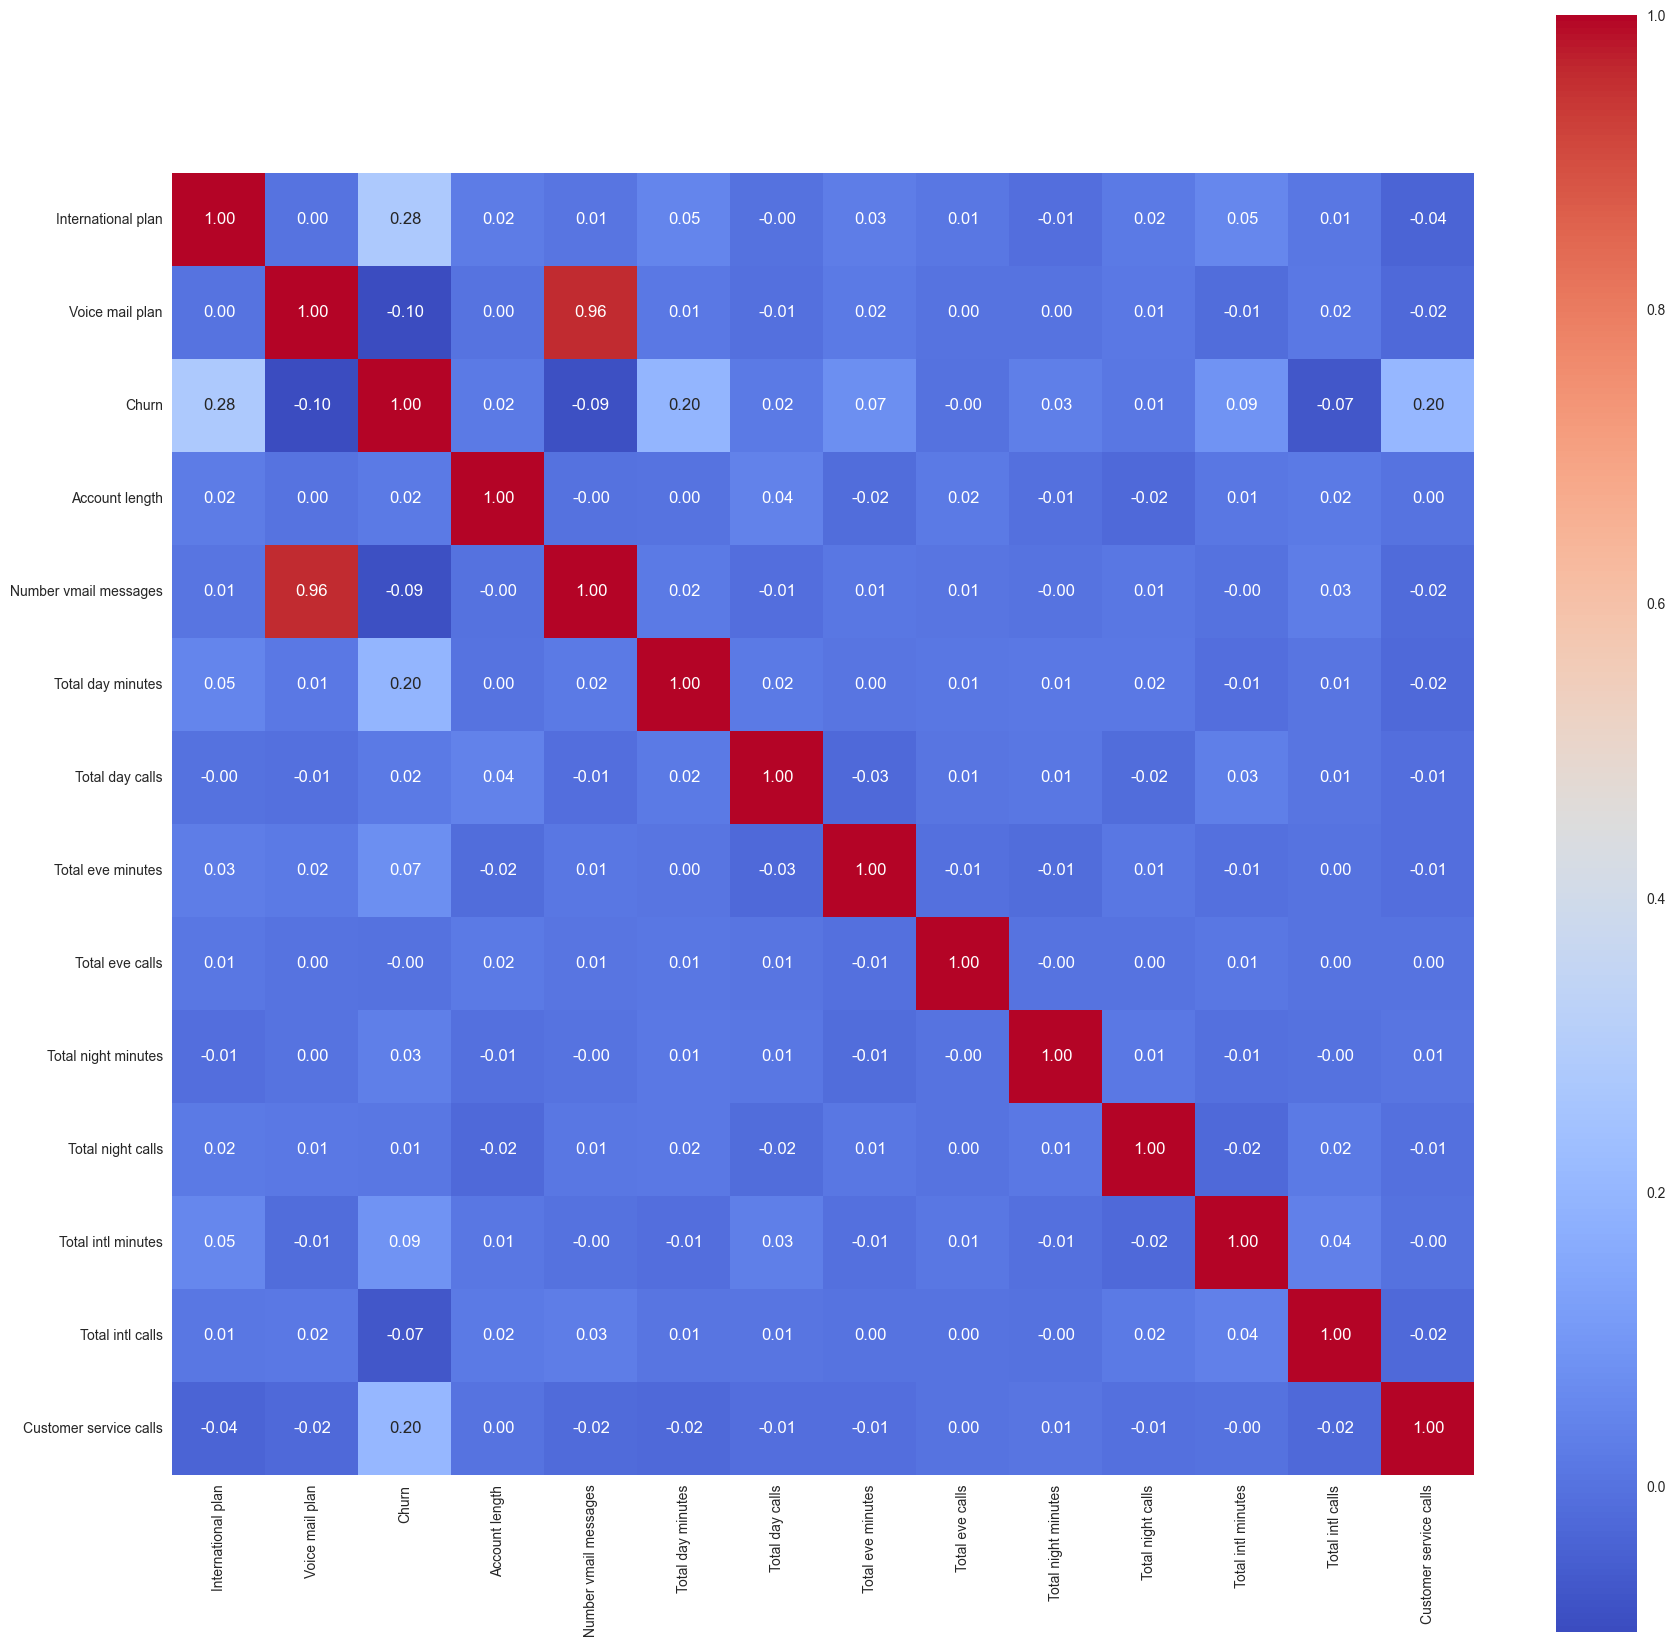

In [60]:
numeric_cols = telcom.select_dtypes(include=[np.number])

corr = numeric_cols.corr()

plt.figure(figsize=(21, 21))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='coolwarm')

plt.show()

3.3 Data Visualization

In [61]:
def pca_scatter(pcadf, targetfeature, targetlabel, color):
    tracer = go.Scatter(x = pcadf[pcadf[targetfeature]==targetlabel]["PC1"],
                        y = pcadf[pcadf[targetfeature]==targetlabel]["PC2"],
                        name = targetlabel, mode = "markers",
                        marker = dict(color = color, line = dict(width = .5), symbol = "diamond-open"),
                       )
    return tracer

In [62]:
pca = PCA(n_components = 2)

X = telcom[[i for i in telcom.columns if i not in target_col]]
Y = telcom[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1: "Churn", 0: "Not churn"})

layout = go.Layout(dict(title = "Visualizing data with PCA",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "second principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
                       )
                  )
trace1 = pca_scatter(pca_data, 'Churn', 'Churn', 'red')
trace2 = pca_scatter(pca_data, 'Churn', 'Not churn', 'royalblue')
data = [trace2, trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

3.4 Binary variable distribution in customer churn

**vẽ biểu đồ radar để thể hiện các tính năng (features) của dữ liệu dựa trên một thuộc tính nhất định của biến mục tiêu (churn hay không churn).**

In [63]:
def plot_radar(df, aggregate, title):
    data_frame = df[df["Churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns = ["feature", "yes"]
    data_frame_x["no"] = data_frame.shape[0] - data_frame_x["yes"]
    data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]
    
    #count of 1's (yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill = "toself", 
                             name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's (no)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill = "toself", 
                             name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title, height = 600, width = 600))
    
    data = [trace2, trace1]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

**tách ra các cột nhị phân (binary columns) từ DataFrame và sau đó sử dụng hàm plot_radar để vẽ biểu đồ radar cho khách hàng churn và không churn.**

In [64]:
#separating binary columns
bi_cs = telcom.nunique()[telcom.nunique() == 2].keys()
dat_rad = telcom[bi_cs]

#plotting radar chart for churn and not churn customers (binary variables)
plot_radar(dat_rad, 1, "Churn customers")
plot_radar(dat_rad, 0, "Not churn customers")

# 4. Model Building


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_curve, average_precision_score
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

**Tạo hàm  và đánh giá một mô hình dự đoán churn cho dịch vụ viễn thông, sau đó vẽ các biểu đồ phản hồi về hiệu suất của mô hình.**

In [66]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    # Tính ma trận nhầm lẫn
    conf_matrix = confusion_matrix(testing_y, predictions)
    # tính ROC AUC
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    # Biểu đồ ma trận nhầm lẫn
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    
    # Biểu đồ ROC curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
        #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        #subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic')
                           )
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig['layout'].update(showlegend=False, title="Model performance",
                         autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)',
                         paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)
    
    if threshold_plot == True: 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

4.5. Decision Tree Classifier


In [67]:
from sklearn.tree import  export_graphviz
from graphviz import Source
from IPython.display import display




In [68]:

# Định nghĩa các đặc trưng độc lập được nghiên cứu hoặc sử dụng (cột)
cols = [i for i in telcom.columns if i not in target_col]
target_col = ['Churn']

# Chia tập dữ liệu chính thành tập dữ liệu con huấn luyện và tập dữ liệu con kiểm tra
x_train, x_test, y_train, y_test = train_test_split(telcom[cols], telcom[target_col], 
                                                    test_size = .25, random_state = 111)


# Chia tập dữ liệu chính chưa được tỉ lệ hóa thành tập dữ liệu con huấn luyện và tập dữ liệu con kiểm tra
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(df_telcom_og[cols], telcom[target_col],
                                                                test_size = .25, random_state = 111)

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       547
           1       0.79      0.63      0.70       120

    accuracy                           0.90       667
   macro avg       0.86      0.80      0.82       667
weighted avg       0.90      0.90      0.90       667

Accuracy Score: 0.904047976011994
Area under curve: 0.7983851310176721 



c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



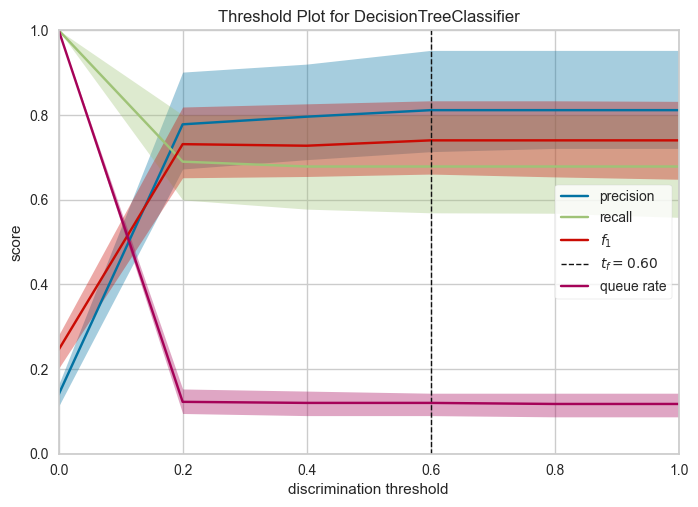

In [69]:

# tạo đối tượng với các hypepr  parameters , huấn luyện mô hình và vẽ biểu đồ
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

telecom_churn_prediction(decision_tree, x_train, x_test, y_train, y_test, "features", threshold_plot=True)



In [70]:
# import SVM
from sklearn.svm import SVC


# defining the model
svm = SVC(kernel = 'poly', degree = 3, C = 1.0, probability = True, random_state = 123)

# calling the function
telecom_churn_prediction(svm, x_train, x_test, y_train, y_test, "None", threshold_plot=False)





c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       547
           1       0.83      0.33      0.48       120

    accuracy                           0.87       667
   macro avg       0.85      0.66      0.70       667
weighted avg       0.86      0.87      0.84       667

Accuracy Score: 0.8680659670164917
Area under curve: 0.6593540524070688 



In [71]:
# import 
